In [56]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [57]:
dataset = pandas.read_csv("bank.csv")
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [58]:
#unique values of each categorical column
categorical_columns=[]
for i in dataset.columns:
    if dataset[i].dtype == 'object':
        categorical_columns.append(i)
       
for column in categorical_columns:
    print(f'{ column.upper() }:{dataset[column].unique()}')
    print('\n')

JOB:['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']


MARITAL:['married' 'single' 'divorced']


EDUCATION:['secondary' 'tertiary' 'primary' 'unknown']


DEFAULT:['no' 'yes']


HOUSING:['yes' 'no']


LOAN:['no' 'yes']


CONTACT:['unknown' 'cellular' 'telephone']


MONTH:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


POUTCOME:['unknown' 'other' 'failure' 'success']


DEPOSIT:['yes' 'no']




In [59]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# **Preprocessing**

**splitting the dataset into features and label**

In [60]:
features = dataset.iloc[:,0:-1].values
label = dataset.iloc[:,-1].values

**Encoding The Categorical Data** 

In [61]:
#Encoding features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sys
np.set_printoptions(threshold=sys.maxsize)
#np.set_printoptions(threshold = False) 
column_transformer = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1,2,3,4,6,7,8,10,15] )] , remainder="passthrough")
features = np.array(column_transformer.fit_transform(features))
#non encoded columns start at index 44
print(features[0])

[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0
 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 59 2343 5 1042 1 -1 0]


In [62]:
#Encoding Boolean Label
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
label = labelEncoder.fit_transform(label)

**Splitting The Data Into Training and Testing Sets**

In [63]:
from sklearn.model_selection import train_test_split
features_train, features_test, label_train, label_test = train_test_split(features,label, test_size = 0.2, random_state = 1)

**Performing Feature Scaling On The Dataset**

In [64]:
#Standardisation method (having all numeric values between -3 and +3)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#apply this scaler on the features_train on the non encoded numerical columns only starting from index 44
features_train[:,44:] = scaler.fit_transform(features_train[:,44:])
#apply the same scaler of the training set on the test set
features_test[:,44:] = scaler.transform(features_test[:,44:])

In [65]:
print(features_train[:1,:])

[[0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0
  0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 -0.018830524880013185
  0.7348454322671094 0.39970495723932775 -0.6964846888895686
  -0.5500223704517061 -0.48107659249546664 -0.3612238014205161]]


In [66]:
print(features_test[:1,:])

[[1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0
  0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 -0.8586794592138679
  -0.30187457165485004 -1.2654792687374568 -0.8010198803610349
  -0.5500223704517061 -0.48107659249546664 -0.3612238014205161]]


# **LOGISTIC REGRESSION**

**Training**

At C = 0.001:
Accuracy In Decimal: 0.793999104343932


Classification Report

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1165
           1       0.82      0.73      0.77      1068

    accuracy                           0.79      2233
   macro avg       0.80      0.79      0.79      2233
weighted avg       0.80      0.79      0.79      2233



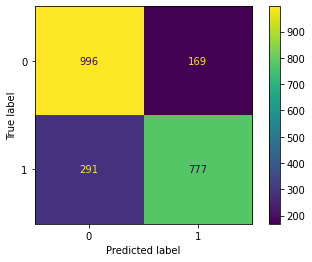

-------------------------------------------------
At C = 0.01:
Accuracy In Decimal: 0.8217644424540976


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1165
           1       0.83      0.79      0.81      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



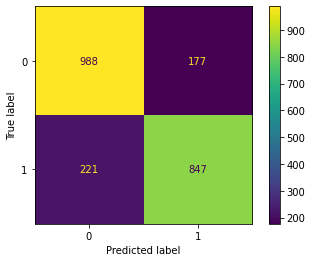

-------------------------------------------------
At C = 0.1:
Accuracy In Decimal: 0.8231079265562025


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1165
           1       0.83      0.80      0.81      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



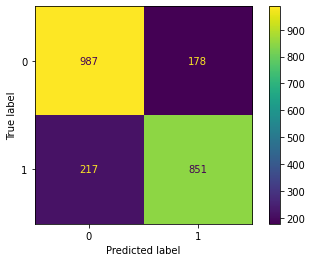

-------------------------------------------------
At C = 1:
Accuracy In Decimal: 0.8231079265562025


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1165
           1       0.83      0.79      0.81      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



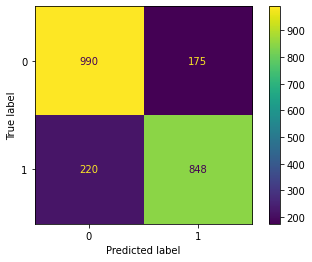

-------------------------------------------------
At C = 10:
Accuracy In Decimal: 0.8222122704881325


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1165
           1       0.83      0.79      0.81      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



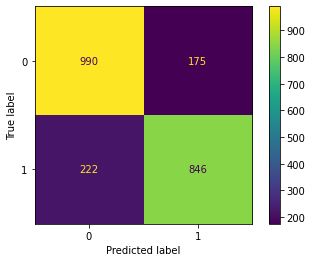

-------------------------------------------------
At C = 100:
Accuracy In Decimal: 0.8222122704881325


Classification Report

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1165
           1       0.83      0.79      0.81      1068

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



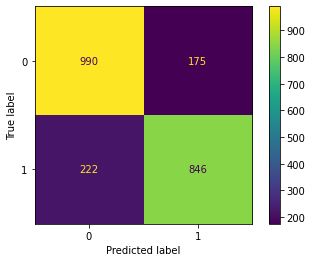

-------------------------------------------------


In [98]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
c_range = [0.001,0.01,0.1,1,10,100]
accuracies = []
for c in c_range:
   # training the classifier with different values of c
   classifier = LogisticRegression(max_iter=150, C=c)
   #train the classifier
   classifier.fit(features_train, label_train)
   #prediction
   predicted_labels = classifier.predict(features_test)
   #metrics visualizations
   from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score,classification_report
   actual_labels=label_test
   print("At C = "+str(c)+":")
   accuracy = accuracy_score(actual_labels, predicted_labels)
   print("Accuracy In Decimal: "+str(accuracy))
   # Print the Classification Report
   cr = classification_report(actual_labels, predicted_labels)
   print("\n\nClassification Report\n")
   print(cr)
   confusion_matrix = confusion_matrix(actual_labels, predicted_labels)
   display_matrix = ConfusionMatrixDisplay(confusion_matrix)
   display_matrix.plot()
   plt.show()
   print("-------------------------------------------------")
 